# Python Image Tutorial
http://pythonvision.org/basic-tutorial/
https://stackoverflow.com/questions/5298884/finding-number-of-colored-shapes-from-picture-using-python
https://docs.opencv.org/3.3.1/d3/db4/tutorial_py_watershed.html
http://blog.christianperone.com/2014/06/simple-and-effective-coin-segmentation-using-python-and-opencv/
http://opensciencecafe.org/2016/01/counting-change-image-analysis-python/
https://www.learnopencv.com/blob-detection-using-opencv-python-c/
https://www.pyimagesearch.com/2014/10/20/finding-shapes-images-using-python-opencv/
http://mahotas.readthedocs.io/en/latest/labeled.html
https://www.kaggle.com/arjanso/simple-tensorflow-prediction-pipeline

In [1]:
import numpy as np
import pylab
import mahotas as mh


In [2]:
dna = mh.imread('dnatest.jpeg')

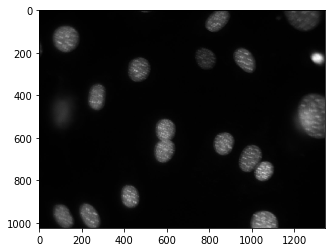

In [3]:
#pylab.rcParams['figure.figsize'] = (10,10)
pylab.imshow(dna)
pylab.gray()
pylab.show()

In [4]:
print(dna.shape)
print(dna.dtype)
print(dna.max())
print(dna.min())

(1024, 1344)
uint8
252
0


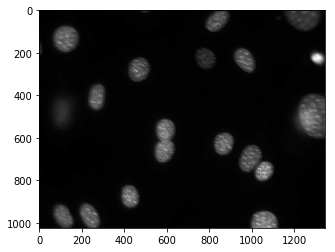

In [5]:
pylab.imshow(dna // 2)
pylab.show()

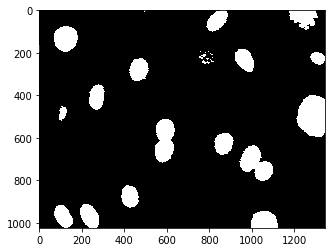

In [6]:
T = mh.thresholding.otsu(dna)
pylab.imshow(dna > T)
pylab.show()


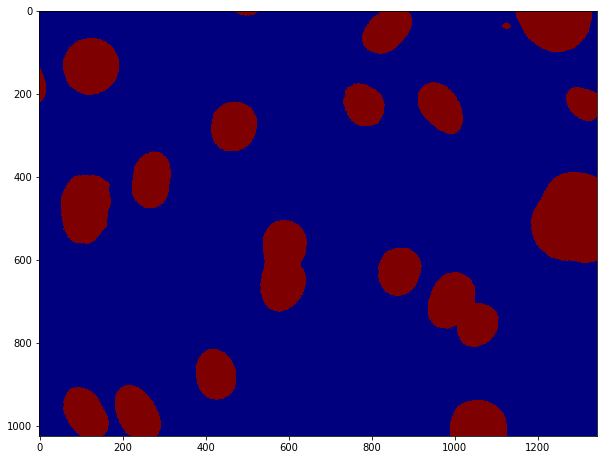

In [28]:
pylab.imshow(dna > dna.mean())
pylab.show()

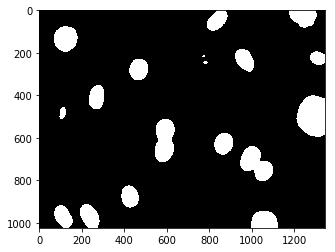

In [7]:
dnaf = mh.gaussian_filter(dna, 8)
T = mh.thresholding.otsu(dna)
pylab.imshow(dnaf > T)
pylab.show()

18


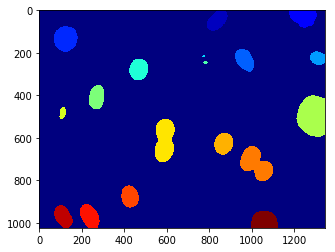

In [11]:
labeled,nr_objects = mh.label(dnaf > T)
print (nr_objects)
pylab.imshow(labeled)
pylab.jet()
pylab.show()

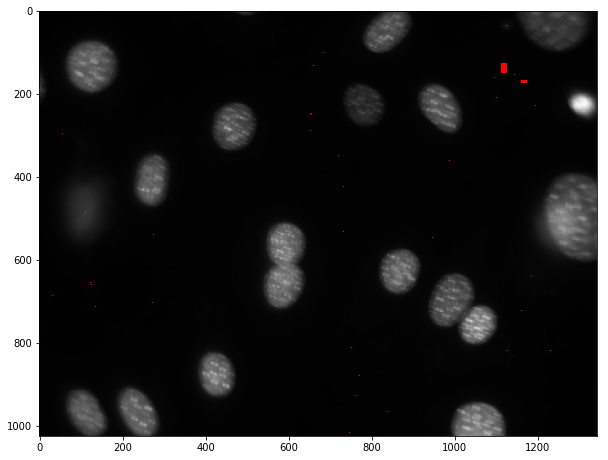

In [25]:
dnaf = mh.gaussian_filter(dna, 8)
rmax = mh.regmax(dnaf)
pylab.imshow(mh.overlay(dna, rmax))
pylab.show()

In [27]:
seeds,nr_nuclei = mh.label(rmax)
print (nr_nuclei)

231


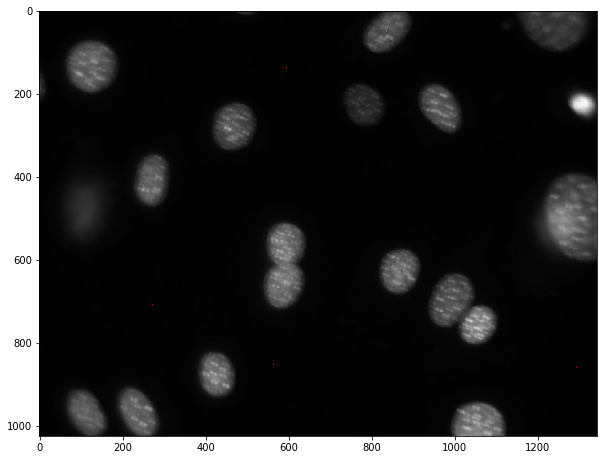

In [30]:
print(dnaf)

[[ 1.          1.          1.         ...,  9.25339223  9.13803302
   9.08012871]
 [ 1.          1.          1.         ...,  9.25078765  9.13518282
   9.07715502]
 [ 1.          1.          1.         ...,  9.24549432  9.1294058
   9.07113486]
 ..., 
 [ 2.          2.          2.         ...,  1.          1.          1.        ]
 [ 2.          2.          2.         ...,  1.          1.          1.        ]
 [ 2.          2.          2.         ...,  1.          1.          1.        ]]


In [42]:
dna

array([[1, 1, 1, ..., 7, 7, 6],
       [1, 1, 1, ..., 7, 7, 6],
       [1, 1, 1, ..., 7, 7, 6],
       ..., 
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]], dtype=uint8)

In [48]:
filtered = mh.gaussian_filter(dna, 10)
result = filtered.astype('uint8')
rmax = mh.regmax(result)

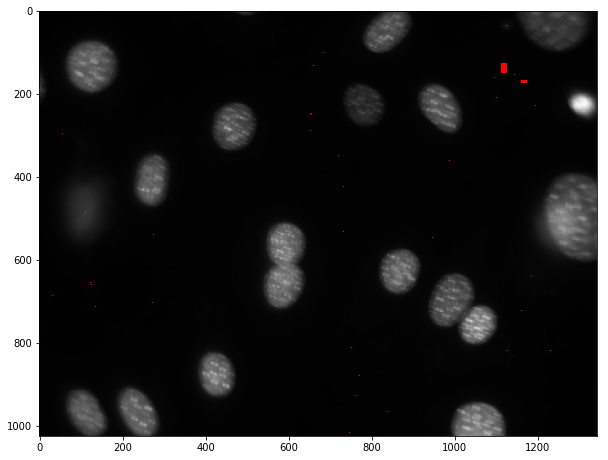

In [18]:
pylab.imshow(mh.overlay(dna, rmax))
pylab.show()

In [55]:
labeled, nr_objects = mh.label(rmax)
print ('Broj pronadenih objekata je {}.'.format(nr_objects))

Broj pronadenih objekata je 35.


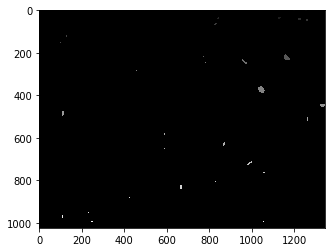

In [56]:
pylab.imshow(labeled)
pylab.show()

### Contour Detection
http://opencvpython.blogspot.com/2012/06/hi-this-article-is-tutorial-which-try.html

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [88]:
im = cv2.imread('dnatest.jpeg')

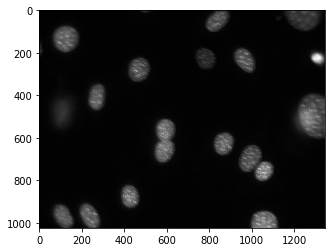

In [89]:
plt.imshow(im)
plt.show()

In [91]:
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

In [92]:
ret,thresh = cv2.threshold(imgray,127,255,0)

In [94]:
_, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [95]:
len(contours)

110

In [96]:
cnt = contours[0]

In [98]:
len(cnt)

16

In [102]:
print ("I found %d black shapes" % (len(contours)))

I found 110 black shapes


In [ ]:
# loop over the contours
for c in contours:
	# draw the contour and show it
	cv2.drawContours(im, [c], -1, (0, 255, 0), 2)
	cv2.imshow("Image", im)
	cv2.waitKey(0)